In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import scipy.optimize
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]
rcParams.update({'font.size': 18})

(-0.5, 1609.5, 885.5, -0.5)

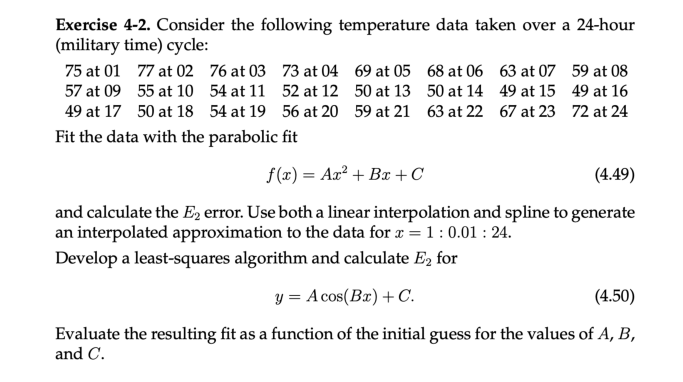

In [7]:
A = imread('4.2.png')
plt.imshow(A)
plt.axis('off')

In [9]:
y = np.array([75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72])

## Creating the matrix A

In [12]:
# for closed form, we can simply use the matrix we derived in Question 1 of the homework. 
A = np.zeros((3, 3), dtype=int)
#fourth power
a = np.zeros(5)
for i in range(5):
    for j in range(1,25):
        a[i] = a[i] + j**i

In [14]:
print(a)

[2.40000e+01 3.00000e+02 4.90000e+03 9.00000e+04 1.76302e+06]


In [15]:
for i in range(3):
    for j in range(3):
        A[i][j] = a[4-i-j]
print(A)

[[1763020   90000    4900]
 [  90000    4900     300]
 [   4900     300      24]]


## Creating the matrix b

In [18]:
B = np.array([[0], [0], [0]])
for i in range(3):
    for j in range(24):
        B[i][0] = B[i][0] + (y[j]*((j+1)**(3-i-1)))

In [19]:
print(B)

[[284910]
 [ 17338]
 [  1446]]


## Solving Ax=b

In [20]:
x = np.linalg.solve(A, B)
print(x)

[[ 0.18493463]
 [-5.26423533]
 [88.29545455]]


In [21]:
#therefore x contains the variables for the quadratic fit Ax^2+Bx+C

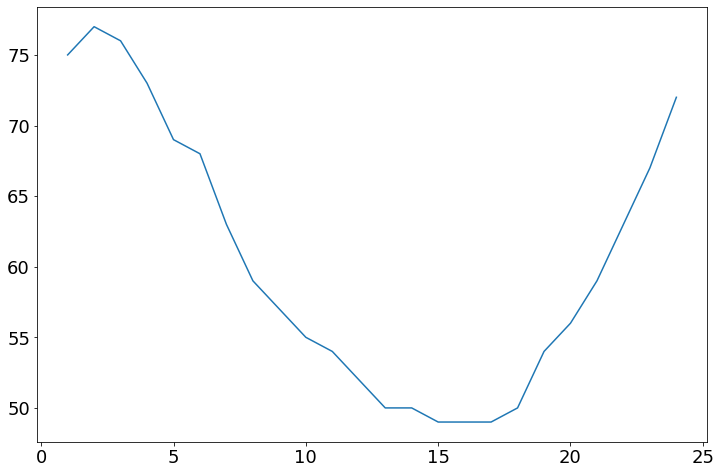

In [31]:
X = np.arange(1,25)
#X = np.array([[x ** 2, x, 1] for x in x_values])


In [34]:
f = np.array([np.dot([[a**2, a ,1]], x) for a in range(1,25)])

In [37]:
f = np.squeeze(f)
print(np.shape(f))

(24,)


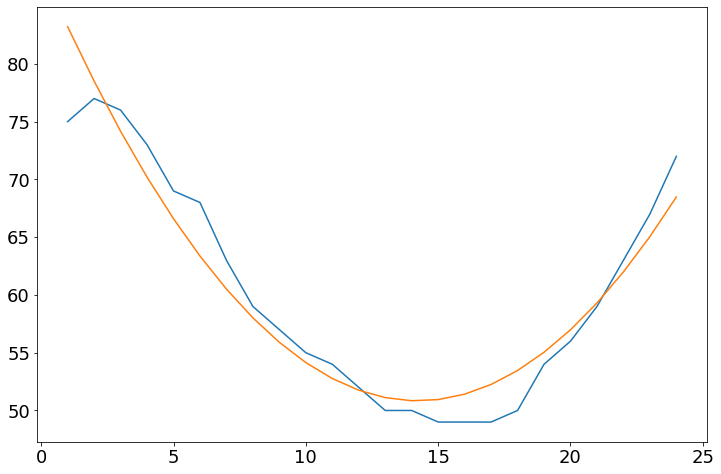

In [38]:
plt.plot(X, y)
plt.plot(X,f)
plt.show()

In [39]:
error = 0;
for i in range(24):
    error = error + (y[i] - f[i])**2
    
print(error)

172.35927637579798


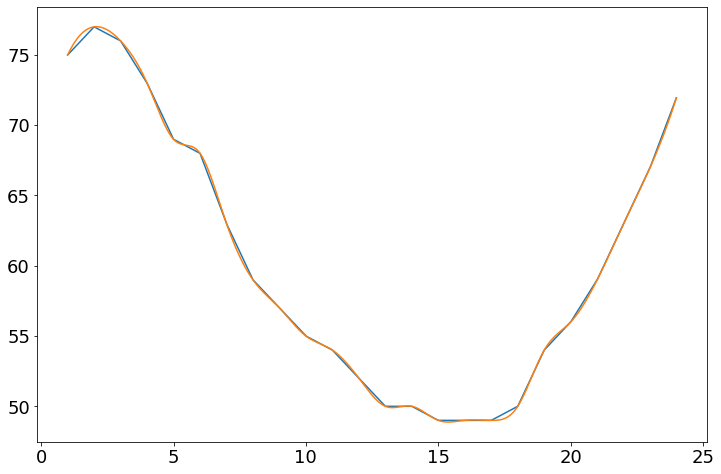

In [43]:
from scipy import interpolate

# Create a linear interpolation function
linear_interp = interpolate.interp1d(X, y, kind='linear')

# Create a spline interpolation function
spline_interp = interpolate.interp1d(X, y, kind='cubic')

# Generate interpolated values for x ranging from 1 to 24 with a step of 0.01
new_x = np.arange(1, 24, 0.01)
linear_interpolated_values = linear_interp(new_x)
spline_interpolated_values = spline_interp(new_x)

plt.plot(new_x,linear_interpolated_values)
plt.plot(new_x,spline_interpolated_values)
plt.show()

In [44]:
# for cos function considering the same A, B, C values

In [48]:
g = np.zeros(24, dtype=int)
for i in range(1,25):
    g[i-1]= x[0][0]*np.cos(x[1][0]*i)+x[2][0]


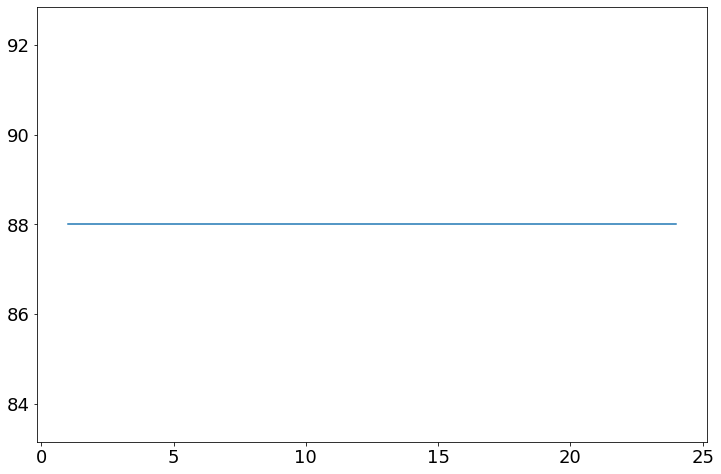

In [49]:
plt.plot(X,g)
plt.show()